<a href="https://colab.research.google.com/github/msaid1976/MLHelper/blob/master/Kylie_Ying_TensorFlow_for_ML_%E2%80%93_Feed_Forward_Neural_Network_Text_Classification_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/DataSets/wine-reviews.csv", usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [10]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [6]:
df = df.dropna(subset=["description", "points"])

In [7]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


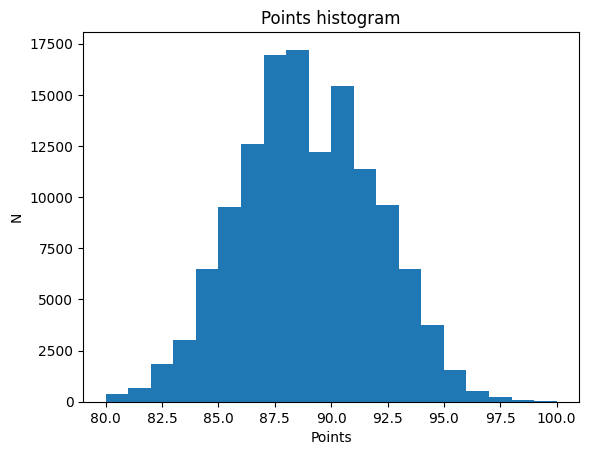

In [8]:
plt.hist(df.points, bins=20)
plt.title("Points histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [ ]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [ ]:
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

# Embedding + Model

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.66383505, -0.057418  ,  0.0286078 , ...,  0.11172798,
        -0.30861512,  0.24741505],
       [ 0.36183977, -0.02285678,  0.25661045, ..., -0.00561368,
        -0.23687455,  0.08067801],
       [ 0.20946807, -0.2531636 , -0.03288614, ...,  0.14065136,
         0.11807199, -0.00634808],
       ...,
       [ 0.5662616 , -0.37737784, -0.09074587, ..., -0.09035674,
        -0.0739397 , -0.03858592],
       [ 0.21872525, -0.18752782, -0.01466276, ...,  0.10489956,
         0.06773299,  0.20617782],
       [ 0.20042461, -0.08347077,  0.09107109, ..., -0.10919145,
        -0.22404447,  0.02849986]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 3s 22ms/step - loss: 0.6836 - accuracy: 0.5948


[0.6836170554161072, 0.5948007106781006]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 10ms/step - loss: 0.6834 - accuracy: 0.5968


[0.6834288239479065, 0.5968300104141235]

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 81s 789ms/step - loss: 0.6175 - accuracy: 0.6555 - val_loss: 0.4833 - val_accuracy: 0.7825
Epoch 2/5
102/102 [==============================] - 70s 683ms/step - loss: 0.4621 - accuracy: 0.7832 - val_loss: 0.3974 - val_accuracy: 0.8180
Epoch 3/5
102/102 [==============================] - 69s 676ms/step - loss: 0.3946 - accuracy: 0.8284 - val_loss: 0.3794 - val_accuracy: 0.8262
Epoch 4/5
102/102 [==============================] - 83s 814ms/step - loss: 0.3603 - accuracy: 0.8478 - val_loss: 0.3754 - val_accuracy: 0.8295
Epoch 5/5
102/102 [==============================] - 82s 804ms/step - loss: 0.3362 - accuracy: 0.8587 - val_loss: 0.3756 - val_accuracy: 0.8342


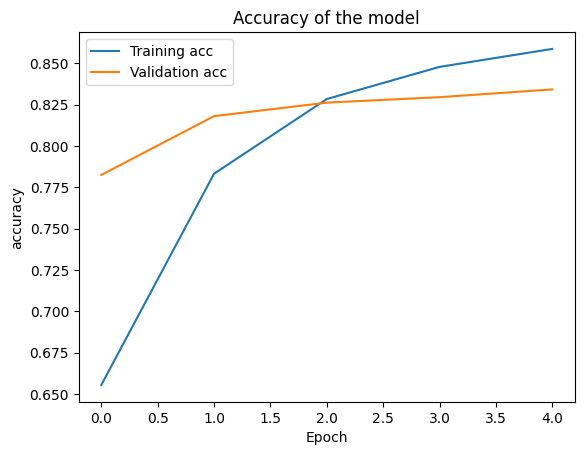

In [ ]:
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of the model")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

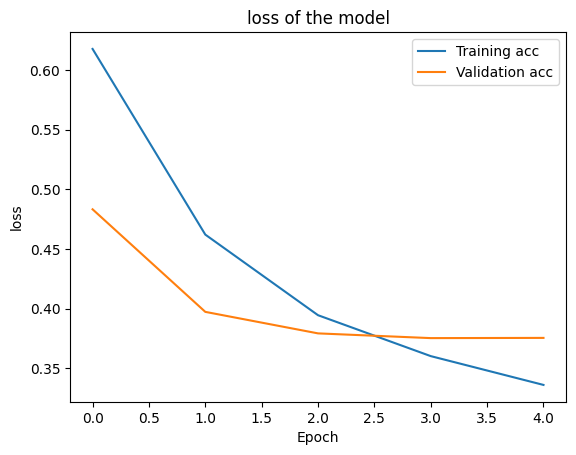

In [ ]:
plt.plot(history.history['loss'], label="Training acc")
plt.plot(history.history['val_loss'], label="Validation acc")
plt.title("loss of the model")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 1s 106ms/step - loss: 0.3728 - accuracy: 0.8292


[0.37284761667251587, 0.8292044997215271]

# LSTM

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 2s 116ms/step - loss: 0.6934 - accuracy: 0.4668


[0.6933674216270447, 0.4668000340461731]

In [ ]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 40s 349ms/step - loss: 0.5387 - accuracy: 0.7172 - val_loss: 0.3999 - val_accuracy: 0.8216
Epoch 2/5
102/102 [==============================] - 37s 360ms/step - loss: 0.3741 - accuracy: 0.8350 - val_loss: 0.3588 - val_accuracy: 0.8405
Epoch 3/5
102/102 [==============================] - 37s 361ms/step - loss: 0.3523 - accuracy: 0.8448 - val_loss: 0.3549 - val_accuracy: 0.8389
Epoch 4/5
102/102 [==============================] - 37s 362ms/step - loss: 0.3422 - accuracy: 0.8505 - val_loss: 0.3574 - val_accuracy: 0.8383
Epoch 5/5
102/102 [==============================] - 37s 360ms/step - loss: 0.3372 - accuracy: 0.8522 - val_loss: 0.3545 - val_accuracy: 0.8400


In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 3s 218ms/step - loss: 0.3500 - accuracy: 0.8361


[0.35002198815345764, 0.8361286520957947]